# UTS - Laboratorium KCB 2
Disini, kalian akan diuji dalam pemahaman kalian akan algoritma KNN, dan kemampuan kalian dalam membuat model KNN dan Regresi Linear.

## Import Dependecies

Panggil Library yang kalian butuhkan disini.

In [59]:
# Panggil Library
import pandas as pd               # Untuk tabel data
from scipy import stats           # Untuk statistik
import numpy as np                # Untuk perhitungan matriks dan data
import seaborn as sns             # Untuk visualisasi data
import matplotlib.pyplot as plt   # Untuk menampilkan data
%matplotlib inline 

import statsmodels as sm
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.linear_model import SGDRegressor # Regresi Linear dengan Gradient Descent


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import warnings
warnings.filterwarnings('ignore')

## Load Dataset
Disini panggil kedua dataset kalian, yang pertama untuk klasifikasi dan yang kedua untuk regresi.

Untuk dataset regresi, kalian bebas menggunakan dataset apapun. Pastikan tidak sama dengan teman kalian. 

Jika sama, maka bagian regresi akan dianggap 0.

In [2]:
# DataFrame pertama untuk klasifikasi
gl = pd.read_csv('Galaxy_2.csv')

# DataFrame kedua untuk regresi linear
ds = pd.read_csv('ds_salaries.csv')

Coba panggil kedua data kalian.

### Dataset 1 untuk klasifikasi

In [3]:
# Panggil data 1
gl

,alpha,u,class
0,135.689107,23.87882,GALAXY
1,144.826101,24.77759,GALAXY
2,142.188790,25.26307,GALAXY
3,338.741038,22.13682,GALAXY
4,345.282593,19.43718,GALAXY
...,...,...,...
99995,39.620709,22.16759,GALAXY
99996,29.493819,22.69118,GALAXY
99997,224.587407,21.16916,GALAXY
99998,212.268621,25.35039,GALAXY


#### Data Cleaning

Kita lihat apakah ada data yang kosong ditiap kolom.

In [4]:
gl.isnull().sum()

alpha    0
u        0
class    0
dtype: int64

#### Data Wrangling

In [5]:
# Disini kita lihat bentuk data
gl.shape

(100000, 3)

In [6]:
gl.describe()

,alpha,u
count,100000.000000,100000.000000
mean,177.629117,21.980468
std,96.502241,31.769291
min,0.005528,-9999.000000
25%,127.518222,20.352353
50%,180.900700,22.179135
75%,233.895005,23.687440
max,359.999810,32.781390


In [7]:
gl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   alpha   100000 non-null  float64
 1   u       100000 non-null  float64
 2   class   100000 non-null  object 
dtypes: float64(2), object(1)
memory usage: 2.3+ MB


karena kolom class masih bertipe object, mari kita ganti ke tipe category

In [8]:
# ubah tipe data
gl["class"] = gl["class"].astype("category")

gl.dtypes

alpha     float64
u         float64
class    category
dtype: object

#### Exploratory Data Analysis

Disini, kita akan lihat kondisi data untuk beberapa variabel. Disini juga kita lihat hubungan antar variabel, terutama bagaimana beberapa kolom berhubungan dengan kolom yang ingin kita prediksi, kolom class.

Pertama, coba kita lihat class, bagaimana komposisinya?

In [9]:
gl['class'].value_counts()

GALAXY    59445
STAR      21594
QSO       18961
Name: class, dtype: int64

<AxesSubplot:xlabel='class', ylabel='count'>

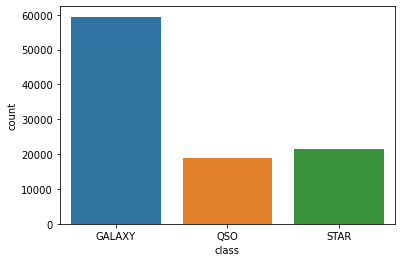

In [10]:
# Kita gunakan barchart
sns.countplot(x='class',data=gl)

Selanjutnya, coba kita lihat data-data yang numerik.

Sebelumnya, kita pecah data menjadi dua. Yaitu **variabel independen dan variabel dependen.** Kita buat terlebih dahulu variabel independen.

In [11]:
# Variabel independen kita adalah seluruh baris dengan kolom alpha dan u
x=gl.iloc[:,0:2]
x.head(3)

,alpha,u
0,135.689107,23.87882
1,144.826101,24.77759
2,142.188790,25.26307


Kemudian, kita buat variabel dependen.

In [12]:
# variabel dependen kita adalah seluruh baris dengan kolom class
gl['class'].unique()

['GALAXY', 'QSO', 'STAR']
Categories (3, object): ['GALAXY', 'QSO', 'STAR']

In [13]:
y=gl.iloc[0:,2]

In [14]:
# Kita lihat saja secara sekilas dengan describe
x.describe()

,alpha,u
count,100000.000000,100000.000000
mean,177.629117,21.980468
std,96.502241,31.769291
min,0.005528,-9999.000000
25%,127.518222,20.352353
50%,180.900700,22.179135
75%,233.895005,23.687440
max,359.999810,32.781390


In [15]:
233 - 127

106

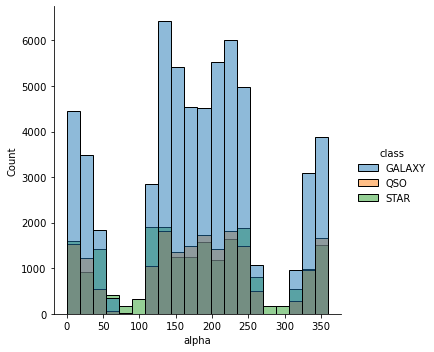

In [16]:
sns.displot(gl, x='alpha',hue='class', bins=20)

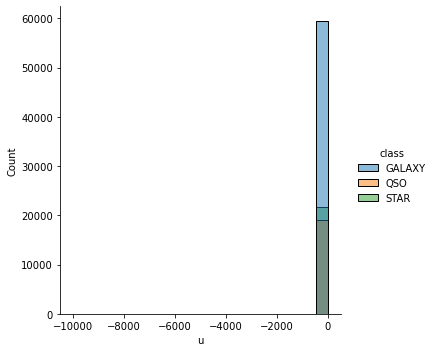

In [17]:
sns.displot(gl, x='u',hue='class', bins=20)

#### **EDA Conclusion**

- Terdapat 3 bagian dari kolom class, yaitu GALAXY(59445), QSO(21594), dan STAR(18961). 
- Seluruh data numerik berdistribusi normal.

> Data pada dataset 1 sudah bersih dah siap untuk dilakukan pemodelan

### Dataset 2 untuk regresi

In [18]:
# Panggil data 2
ds

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
...,...,...,...,...,...,...,...,...,...,...,...,...
602,602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
605,605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M


Cantumkan Link Menuju Sumber Download Dataset 2 (Regresi) Kalian : Untuk datasetnya, saya akan menggunakan dataset Data Science Job Salaries yang mana tersedia di Kaggle. Kalian juga dapat mengunduhnya [disini](https://www.kaggle.com/datasets/ruchi798/data-science-job-salaries)

#### Understanding Data

In [19]:
'''
work_year : Tahun gaji dibayarkan.
experience_level : Tingkatan pengalaman berdarkan tahun terakhir, diantaranya: EN Entry-level / Junior MI Mid-level / Intermediate SE Senior-level / Expert EX Executive-level / Director
employment_type  : Tipe karyawan, diantaranya: PT Part-time, FT Full-time, CT Contract, dan FL Freelance
job_title : Jenis pekerjaan tahun ini.
salary : Gaji kotor yang dibayarkan
salary_currency : Mata uang gaji yang dibayarkan berdasarkan currency
salary_in_usd : Gaji kotor yang dibayarkan berdasarkan kurs dollar
employee_residence : Tempat tinggal karyawan
remote_ratio : Tipe cara bekerja, diantaranya: 0: Tidak remote (<= 20%), 50: sebagian remote, dan 100: Fully remote (>=80%)
company_location : Lokasi Perusahaan bekerja
company_size : Jumlah pegawai perusahaan, diantaranya S(small): <= 50 karyawan, M(medium): 50 <= M <= 250 karyawan, dan L(Large): >= 250 karyawan
'''

'\nwork_year : Tahun gaji dibayarkan.\nexperience_level : Tingkatan pengalaman berdarkan tahun terakhir, diantaranya: EN Entry-level / Junior MI Mid-level / Intermediate SE Senior-level / Expert EX Executive-level / Director\nemployment_type  : Tipe karyawan, diantaranya: PT Part-time, FT Full-time, CT Contract, dan FL Freelance\njob_title : Jenis pekerjaan tahun ini.\nsalary : Gaji kotor yang dibayarkan\nsalary_currency : Mata uang gaji yang dibayarkan berdasarkan currency\nsalary_in_usd : Gaji kotor yang dibayarkan berdasarkan kurs dollar\nemployee_residence : Tempat tinggal karyawan\nremote_ratio : Tipe cara bekerja, diantaranya: 0: Tidak remote (<= 20%), 50: sebagian remote, dan 100: Fully remote (>=80%)\ncompany_location : Lokasi Perusahaan bekerja\ncompany_size : Jumlah pegawai perusahaan, diantaranya S(small): <= 50 karyawan, M(medium): 50 <= M <= 250 karyawan, dan L(Large): >= 250 karyawan\n'

#### Data Cleaning

Kita lihat apakah ada data yang kosong ditiap kolom.

In [20]:
ds.isnull().sum()

Unnamed: 0            0
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

#### Data Wrangling

In [21]:
# Disini kita lihat bentuk data
ds.shape

(607, 12)

In [22]:
ds.describe()

,Unnamed: 0,work_year,salary,salary_in_usd,remote_ratio
count,607.000000,607.000000,6.070000e+02,607.000000,607.00000
mean,303.000000,2021.405272,3.240001e+05,112297.869852,70.92257
std,175.370085,0.692133,1.544357e+06,70957.259411,40.70913
min,0.000000,2020.000000,4.000000e+03,2859.000000,0.00000
25%,151.500000,2021.000000,7.000000e+04,62726.000000,50.00000
50%,303.000000,2022.000000,1.150000e+05,101570.000000,100.00000
75%,454.500000,2022.000000,1.650000e+05,150000.000000,100.00000
max,606.000000,2022.000000,3.040000e+07,600000.000000,100.00000


In [23]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


karena masih terdapat kolom yang masih bertipe object, mari kita ganti ke tipe category

In [24]:
# ubah tipe data

# category
ds["experience_level"] = ds["experience_level"].astype("category")
ds["employment_type"] = ds["employment_type"].astype("category")
ds["job_title"] = ds["job_title"].astype("category")
ds["salary_currency"] = ds["salary_currency"].astype("category")
ds["employee_residence"] = ds["employee_residence"].astype("category")
ds["company_location"] = ds["company_location"].astype("category")
ds["company_size"] = ds["company_size"].astype("category")

ds.dtypes

Unnamed: 0               int64
work_year                int64
experience_level      category
employment_type       category
job_title             category
salary                   int64
salary_currency       category
salary_in_usd            int64
employee_residence    category
remote_ratio             int64
company_location      category
company_size          category
dtype: object

#### Exploratory Data Analysis

In [25]:
ds

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
...,...,...,...,...,...,...,...,...,...,...,...,...
602,602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
605,605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M


<AxesSubplot:ylabel='Density'>

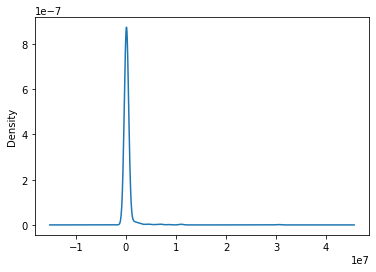

In [26]:
ds['salary'].plot.kde()

Selanjutnya, kita cek hubungan antar tiap variabel terhadap salary

`work_year with salary`

In [27]:
ds.groupby('work_year').salary.aggregate(['count', 'min', 'max'])

,count,min,max
work_year,,,
2020,72,8000,11000000
2021,217,4000,30400000
2022,318,10000,6000000


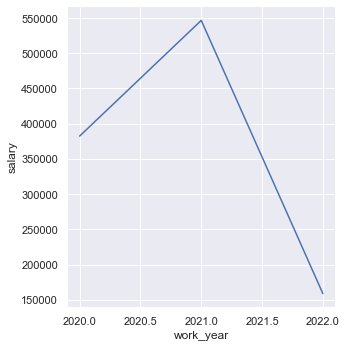

In [28]:
sns.set_theme(style="darkgrid") #setting the grid for all next plots

sns.relplot(data=ds, x='work_year', y='salary', ci=None, kind='line')

`remote_ratio with salary`

In [29]:
ds.groupby('remote_ratio').salary.aggregate(['count', 'min', 'max'])

,count,min,max
remote_ratio,,,
0,127,4000,4900000
50,99,8000,11000000
100,381,4000,30400000


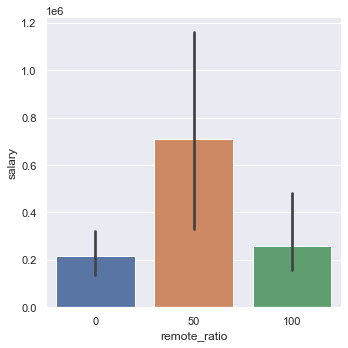

In [30]:
sns.catplot(data=ds, x='remote_ratio', y='salary', kind='bar')

`experience_level with salary`

In [31]:
ds.groupby('experience_level').salary.aggregate(['count', 'min', 'max'])

,count,min,max
experience_level,,,
EN,88,4000,4450000
EX,26,59000,6000000
MI,213,4000,30400000
SE,280,24000,7000000


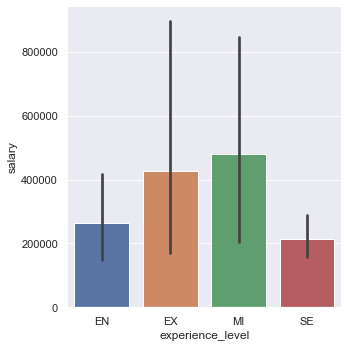

In [32]:
sns.catplot(data=ds, x='experience_level', y='salary', kind='bar')

`employment_type with salary`

In [33]:
ds.groupby('employment_type').salary.aggregate(['count', 'min', 'max'])

,count,min,max
employment_type,,,
CT,5,29000,416000
FL,4,12000,100000
FT,588,4000,30400000
PT,10,8760,400000


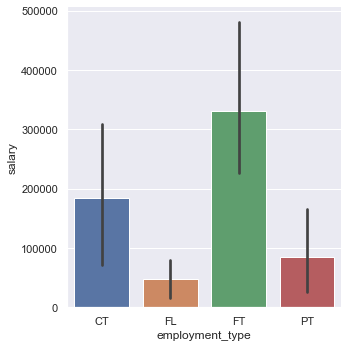

In [34]:
sns.catplot(data=ds, x='employment_type', y='salary', kind='bar')

`company_size with salary`

In [35]:
ds.groupby('company_size').salary.aggregate(['count', 'min', 'max'])

,count,min,max
company_size,,,
L,198,8000,30400000
M,326,4000,2500000
S,83,9272,8500000


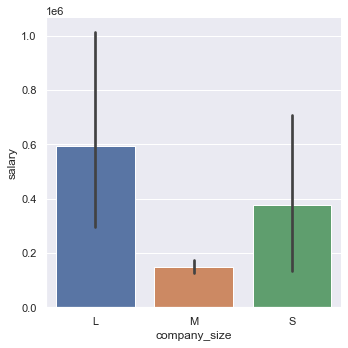

In [36]:
sns.catplot(data=ds, x='company_size', y='salary', kind='bar')

Selanjutnya, kita coba lihat korelasi untuk setiap feature sebelum lakukan prediksi.

In [37]:
correlation = ds.corr()
correlation

,Unnamed: 0,work_year,salary,salary_in_usd,remote_ratio
Unnamed: 0,1.000000,0.886550,-0.096250,0.167025,0.095000
work_year,0.886550,1.000000,-0.087577,0.170493,0.076314
salary,-0.096250,-0.087577,1.000000,-0.083906,-0.014608
salary_in_usd,0.167025,0.170493,-0.083906,1.000000,0.132122
remote_ratio,0.095000,0.076314,-0.014608,0.132122,1.000000


<AxesSubplot:>

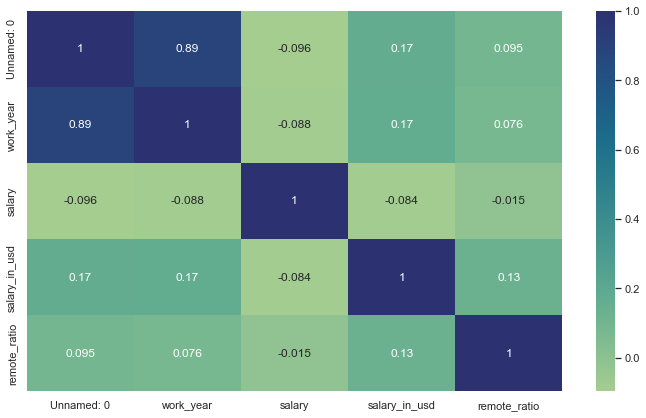

In [38]:
# Visualizing correlation

plt.figure(figsize=(12,7))

sns.heatmap(correlation,annot=True,cmap='crest')

> Berdasarkan korelasi diatas, dengan regresi kita akan memprediksi **salary** pada dataframe.

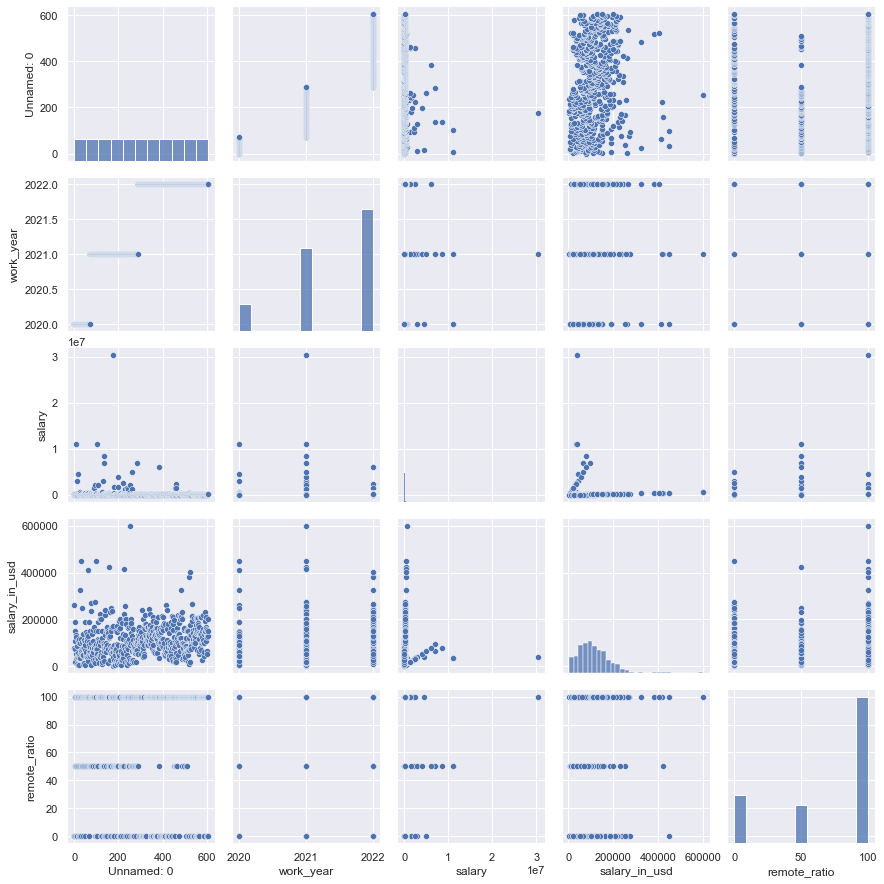

In [39]:
# cek korelasi dengan pairplot
sns.pairplot(ds)
plt.show()

> Data pada Dataset 2 sudah bersih dan siap untuk dilakukan pemodelan.

## Model - Klasifikasi dengan KNN
Disini, gunakan data pertama kalian untuk membentuk model KNN. (Dijelaskan di Colab Modul 4)

In [40]:
# Buat objek model KNN

# Latih Model

### Split data menjadi training dan testing

Pertama, **kita bagi dataset menjadi training dan tes**. Mari kita alokasikan 70% untuk training, dan 30% untuk testing.

In [41]:
# Kita gunakan fungsi dari sklearn
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.3, random_state=0)

Setelah itu, kita panggil Algoritma KNN, dan **masukkan data kedalam algoritma**. Disini, kita pilih menggunakan nilai K = 3, dan metric bernilai euclidean. Artinya, kita akan melihat jarak euclid sebuah data baru terhadap 3 tetangga terdekatnya.

### Training Data

In [42]:
# Panggil KNN dengan nama KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier  
knn_train = KNeighborsClassifier(n_neighbors= 3,weights = 'distance' ,metric="euclidean")
knn_train.fit(x_train.values, y_train.values)

KNeighborsClassifier(metric='euclidean', n_neighbors=3, weights='distance')

In [43]:
# Prediksi dengan model

knn_train.predict([[150, 25]])

array(['STAR'], dtype=object)

Dapat kita lihat dari hasil diatas, program mengatakan bahwa class dengan alpha `150` dan u `25` dimasukkan ke kategori **STAR**

Lalu, bagaimana sebaran kategori dari data training? Coba kita buat scatterplot.

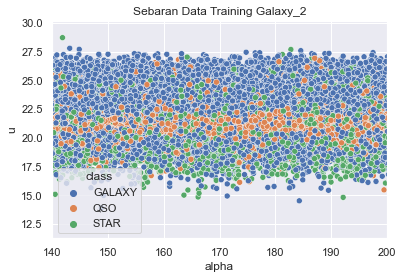

In [44]:
# Ubah terlebih dahulu y_train menjadi sebuah dataframe
df_ytrain = pd.DataFrame(y_train)

# Kita gabungkan x_train dan y_train
df_training = pd.concat([x_train, df_ytrain], axis = 1)
df_training.reset_index(inplace = True)
df_training.drop(columns = ["index"])

# Kita buat scatterplot dengan seaborn agar lebih muda mewarnai kategori
import seaborn as sns
sns.scatterplot(data = df_training, x = 'alpha', y = 'u', hue = 'class')
plt.title('Sebaran Data Training Galaxy_2')
plt.xlim(140, 200)
plt.show()

### Testing Data

Setelah itu, **ayo kita coba lakukan testing**. Melakukan percobaan (Silahkan mencoba sendiri dengan mengganti nilai dibawah)

In [45]:
# Panggil KNN dengan nama KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier  
knn_test = KNeighborsClassifier(n_neighbors= 3,weights = 'distance' ,metric="euclidean")
knn_test.fit(x_test.values, y_test.values)

KNeighborsClassifier(metric='euclidean', n_neighbors=3, weights='distance')

In [67]:
y_pred = knn_test.predict(x_test)

Sekarang, ayo **kita gunakan data testing tadi**, dan bandingkan hasil prediksi dengan realita.

In [46]:
# Kita buat sebuah dataframe dengan beberapa kolom
gl_Testing = pd.DataFrame(columns = ['alpha','u','Prediction','Real'])

# Kemudian, kita isi tiap-tiap kolom dan baris
gl_Testing.loc[:,'alpha'] = x_test['alpha'].values
gl_Testing.loc[:,'u'] = x_test['u'].values
gl_Testing.loc[:,'Prediction'] = knn_test.predict(x_test.to_numpy())
gl_Testing.loc[:,'Real'] = y_test.values

# Lalu, kita panggil
gl_Testing.head(10)

,alpha,u,Prediction,Real
0,13.161838,23.96359,GALAXY,GALAXY
1,200.572696,21.25550,QSO,QSO
2,115.257132,23.27590,GALAXY,GALAXY
3,36.043670,22.03466,GALAXY,GALAXY
4,5.225188,21.22157,GALAXY,GALAXY
5,24.903509,19.68827,QSO,QSO
6,328.312642,21.54650,QSO,QSO
7,145.442679,18.69861,STAR,STAR
8,201.980736,21.89280,GALAXY,GALAXY
9,142.857604,23.64962,GALAXY,GALAXY


Dari sini bisa kita lihat pada sepuluh data teratas, bahwa dengan alpha `142.857604` dan u `23.64962` , diprediksi oleh algoritma termasuk class **GALAXY**, begitu juga dengan alpha `13.161838` dan u `23.96259`.

Selanjutnya, kita coba lihat sebaran kategori dari data testing dengan scatterplot.

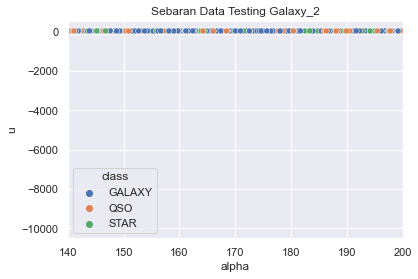

In [47]:
# Ubah terlebih dahulu y_train menjadi sebuah dataframe
df_ytest = pd.DataFrame(y_test)

# Kita gabungkan x_train dan y_train
df_testing = pd.concat([x_test, df_ytest], axis = 1)
df_testing.reset_index(inplace = True)
df_testing.drop(columns = ["index"])

# Kita buat scatterplot dengan seaborn agar lebih muda mewarnai kategori
import seaborn as sns
sns.scatterplot(data = df_testing, x = 'alpha', y = 'u', hue = 'class')
plt.title('Sebaran Data Testing Galaxy_2')
plt.xlim(140, 200)
plt.show()

In [68]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      GALAXY       1.00      1.00      1.00     17809
         QSO       1.00      1.00      1.00      5641
        STAR       1.00      1.00      1.00      6550

    accuracy                           1.00     30000
   macro avg       1.00      1.00      1.00     30000
weighted avg       1.00      1.00      1.00     30000



In [69]:
print(confusion_matrix(y_test, y_pred))

[[17809     0     0]
 [    0  5641     0]
 [    0     0  6550]]


In [70]:
print(accuracy_score(y_test, y_pred)*100)

100.0


### Cara Kerja Algoritma KNN.
Jelaskan cara kerja algoritma knn yang kalian gunakan.

(Penjelasan/Jawaban)

> Algoritma KNN (K-Nearest Neighbors) melakukan prediksi dengan cara mencari nilai median dari tetangga terdekat `(Nearest Neighbors)` dengan menggunakan metode **Euclidean Distance** dan menggunakan mekanisme **penentuan nilai K optimal**. Dalam menggunakan algoritma ini, kita harus menentukan dahulu **query point** yang akan diprediksi untuk ditentukan termasuk bagian dari mana data tersebut `(class)`. Pada pengerjaan kita, kita menggunakan query point `(150, 25)` pada training data. Selanjutnya, kita akan menentukan nilai **K** yang optimal untuk membantu kita dalam memprediksi query point kita. Nilai K pada pengerjaan ini ditentukan dengan menggunakan **nilai yang ganjil atau voting mayoritas** . Alasannya karena persebaran data kita miliki yang sangat banyak dan letak data yang cukup sulit untuk ditentukan posisinya. Oleh karena itu, saya memilih nilai `K = 3` dikarenakan nilai tersebut sangat optimum untuk digunakan dan tidak terlalu sensitif juga terhadap outliers.

> Secara keseluruhan dengan menggunakan pattern yang disebutkan diatas, didapatkan bahwa prediksi `query point (150,25)` training data termasuk pada bagian kategori class **STAR**. Tidak lupa juga setelah itu dilakukan pengujian testing data dengan melihat prediksi dan actual value dari pada testing data dan dilakukan juga scatterplot untuk melihat persebaran data  yang sudah disampaikan diatas. Sekian dari penjelasan saya, terimakasih.

## Model - Regresi Linear dengan Stochastic Gradient Descent
Disini, gunakan data kedua kalian untuk membentuk model regresi linear dengan SGD. (Dijelaskan di Colab Modul 3)

In [48]:
# Buat objek model Regresi Linear dengan SGD

# Latih Model

In [49]:
ds

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
...,...,...,...,...,...,...,...,...,...,...,...,...
602,602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
605,605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M


### Build Model

In [50]:
df1 = ds[['remote_ratio']]
df2 = ds[['salary' ]]

In [51]:
df1.head()

,remote_ratio
0,0
1,0
2,50
3,0
4,50


In [52]:
df2.head()

,salary
0,70000
1,260000
2,85000
3,20000
4,150000


### Split target variable

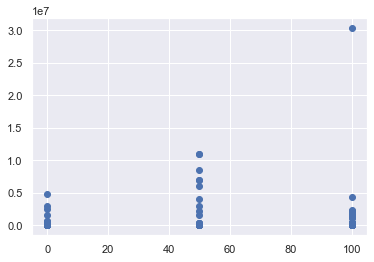

In [53]:
# split target variable
X = df1.values
y = df2.values.reshape(-1,1)
plt.scatter(X, y)

In [54]:
X

array([[  0],
       [  0],
       [ 50],
       [  0],
       [ 50],
       [100],
       [100],
       [ 50],
       [100],
       [ 50],
       [  0],
       [  0],
       [  0],
       [100],
       [100],
       [ 50],
       [100],
       [100],
       [ 50],
       [100],
       [  0],
       [100],
       [ 50],
       [  0],
       [  0],
       [100],
       [ 50],
       [  0],
       [100],
       [ 50],
       [100],
       [100],
       [100],
       [  0],
       [ 50],
       [ 50],
       [100],
       [ 50],
       [100],
       [100],
       [100],
       [ 50],
       [  0],
       [100],
       [ 50],
       [100],
       [100],
       [100],
       [100],
       [ 50],
       [  0],
       [100],
       [ 50],
       [100],
       [100],
       [100],
       [100],
       [100],
       [ 50],
       [100],
       [100],
       [100],
       [ 50],
       [100],
       [100],
       [ 50],
       [  0],
       [100],
       [100],
       [  0],
       [ 50],
      

In [55]:
y

array([[   70000],
       [  260000],
       [   85000],
       [   20000],
       [  150000],
       [   72000],
       [  190000],
       [11000000],
       [  135000],
       [  125000],
       [   45000],
       [ 3000000],
       [   35000],
       [   87000],
       [   85000],
       [    8000],
       [ 4450000],
       [  100000],
       [  423000],
       [   56000],
       [  299000],
       [  450000],
       [   42000],
       [   98000],
       [  115000],
       [  325000],
       [   42000],
       [  720000],
       [  100000],
       [  157000],
       [   51999],
       [   70000],
       [   60000],
       [  450000],
       [   41000],
       [   65000],
       [  103000],
       [  250000],
       [   10000],
       [  138000],
       [   45760],
       [   70000],
       [   44000],
       [  106000],
       [   88000],
       [   14000],
       [   60000],
       [  188000],
       [  105000],
       [   61500],
       [  450000],
       [   91000],
       [  30

### Predict the Model

In [56]:
# Regresi Linear dengan Gradient Descent
sgdr = SGDRegressor(max_iter=10000)
sgdr.fit(X.reshape(-1,1), y)

# Tes Prediksi
P = sgdr.predict(X.reshape(-1,1))
print(f"predict \t:")
print(f"{P} \n")

print(f"theta_0\t: {sgdr.intercept_}")
print(f"theta_1\t: {sgdr.coef_}")
print(f"RMSE\t: {np.sqrt(mean_squared_error(P, y))}")

predict 	:
[ 6.97120367e+09  6.97120367e+09 -2.43343213e+12  6.97120367e+09
 -2.43343213e+12 -4.87383546e+12 -4.87383546e+12 -2.43343213e+12
 -4.87383546e+12 -2.43343213e+12  6.97120367e+09  6.97120367e+09
  6.97120367e+09 -4.87383546e+12 -4.87383546e+12 -2.43343213e+12
 -4.87383546e+12 -4.87383546e+12 -2.43343213e+12 -4.87383546e+12
  6.97120367e+09 -4.87383546e+12 -2.43343213e+12  6.97120367e+09
  6.97120367e+09 -4.87383546e+12 -2.43343213e+12  6.97120367e+09
 -4.87383546e+12 -2.43343213e+12 -4.87383546e+12 -4.87383546e+12
 -4.87383546e+12  6.97120367e+09 -2.43343213e+12 -2.43343213e+12
 -4.87383546e+12 -2.43343213e+12 -4.87383546e+12 -4.87383546e+12
 -4.87383546e+12 -2.43343213e+12  6.97120367e+09 -4.87383546e+12
 -2.43343213e+12 -4.87383546e+12 -4.87383546e+12 -4.87383546e+12
 -4.87383546e+12 -2.43343213e+12  6.97120367e+09 -4.87383546e+12
 -2.43343213e+12 -4.87383546e+12 -4.87383546e+12 -4.87383546e+12
 -4.87383546e+12 -4.87383546e+12 -2.43343213e+12 -4.87383546e+12
 -4.87383546e+

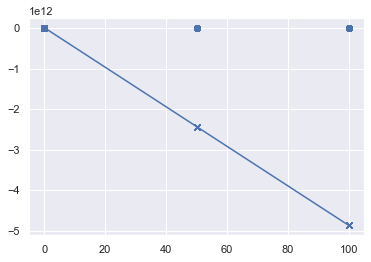

In [57]:
# Tampilkan dengan Grafik
plt.scatter(X, y)
plt.plot(X, P.reshape(1, -1)[0], marker='x')
plt.show()